<a href="https://colab.research.google.com/github/RobaireTH/fcc_bank_model/blob/main/bank_marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Info
Moro S, Rita P, Cortez P. Bank Marketing [dataset]. 2014. UCI Machine Learning Repository. Available from: https://doi.org/10.24432/C5K306.

> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [47]:
pd.read_csv("/content/bank-full.csv")

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


Upon checking the datasets, we see that all the data files a lil cleaning. ⏳

Replacing the ";" seperating the values with "," should do the magic. ☕


In [48]:
def clean_data(path):
  with open(path, "r") as file:
    lines = file.readlines()
  with open(path.replace(".csv", "_cleaned.csv"), "w") as file:
    for line in lines:
      file.write(line.replace(";", ","))

In [49]:
clean_data("/content/bank-full.csv")
clean_data("/content/bank-additional-full.csv")

In [50]:
df1 = pd.read_csv("/content/bank-additional-full_cleaned.csv")
display(df1.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
df2 = pd.read_csv("/content/bank-full_cleaned.csv")
display(df2.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


```python
df1.shape, df2.shape
```
```python
Output: ((41188, 21), (45211, 17))
```
This tells that the second dataset which was collected at a different time does not contain some columns in the first. We can join the two dataframes, and then drop the columns that are not common to both.


In [52]:
# Concatenate the two dataframes
df_combined = pd.concat([df1, df2], ignore_index=True)

# Identify columns that are not in both dataframes
cols_to_drop = [col for col in df_combined.columns if col not in df1.columns or col not in df2.columns]

# Drop the identified columns
df_combined.drop(columns=cols_to_drop, inplace=True)

# Display the shape and head of the combined dataframe to verify
print("Shape of combined dataframe:", df_combined.shape)
display(df_combined.head())

Shape of combined dataframe: (86399, 15)


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no


I somehow feel the balance have quite a lot to do with our target y. But, let's keep going for now. Having to impute it with that much values with either mean val or median value will so affect the model. Mean val imputation is susceptible to outliers.

In [55]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        86399 non-null  int64 
 1   job        86399 non-null  object
 2   marital    86399 non-null  object
 3   education  86399 non-null  object
 4   default    86399 non-null  object
 5   housing    86399 non-null  object
 6   loan       86399 non-null  object
 7   contact    86399 non-null  object
 8   month      86399 non-null  object
 9   duration   86399 non-null  int64 
 10  campaign   86399 non-null  int64 
 11  pdays      86399 non-null  int64 
 12  previous   86399 non-null  int64 
 13  poutcome   86399 non-null  object
 14  y          86399 non-null  object
dtypes: int64(5), object(10)
memory usage: 9.9+ MB


In [56]:
df_combined.describe()

,age,duration,campaign,pdays,previous
count,86399.000000,86399.000000,86399.000000,86399.000000,86399.000000
mean,40.501372,258.221206,2.670286,479.864616,0.386127
std,10.534861,258.362746,2.947825,483.829445,1.713060
min,17.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,180.000000,2.000000,246.000000,0.000000
75%,48.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,63.000000,999.000000,275.000000


In [62]:
df_combined.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
duration,0


In [63]:
df_combined.duplicated().sum()

np.int64(72)

In [65]:
df_combined.drop_duplicates(inplace=True)

### Visualizing the distribution in the dataset

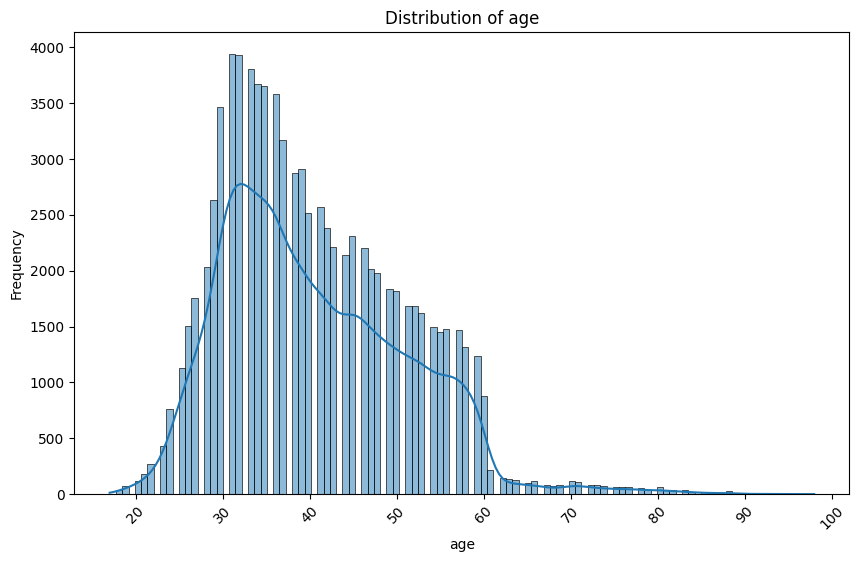

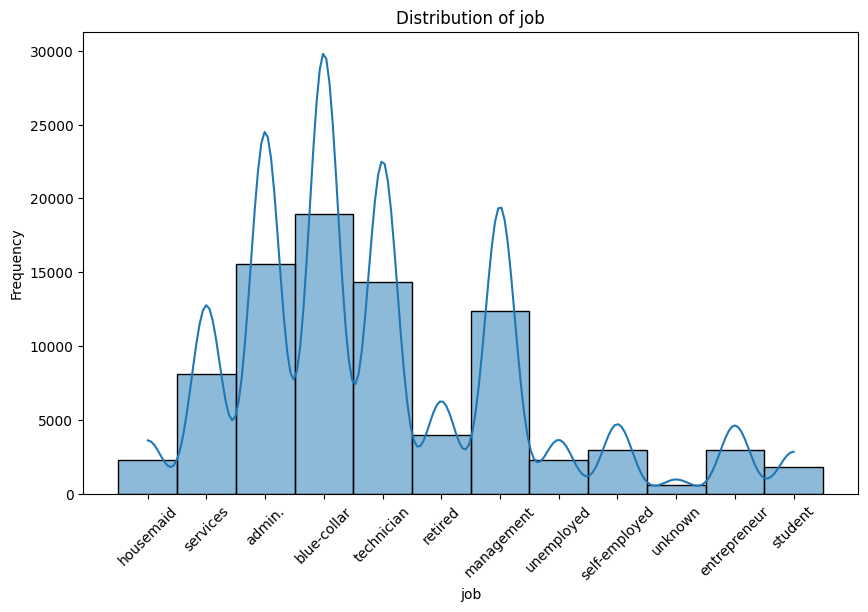

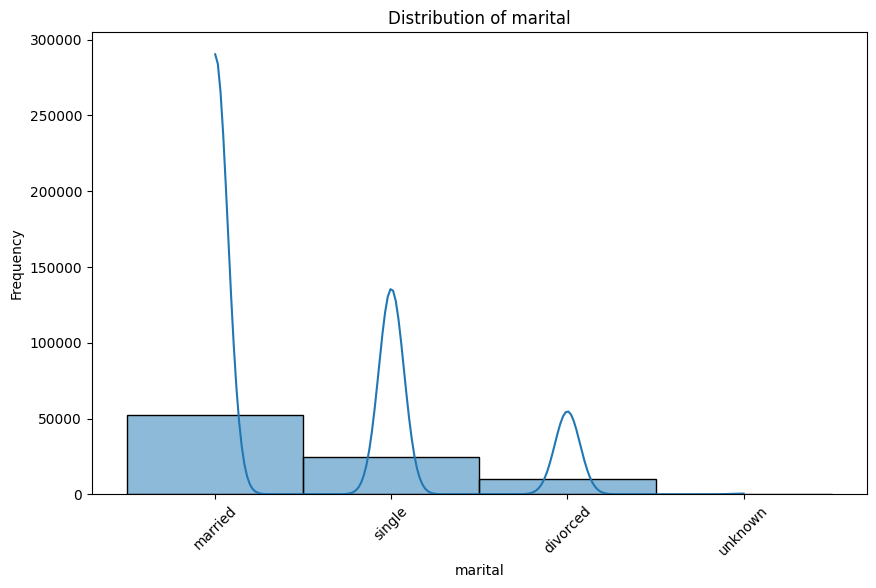

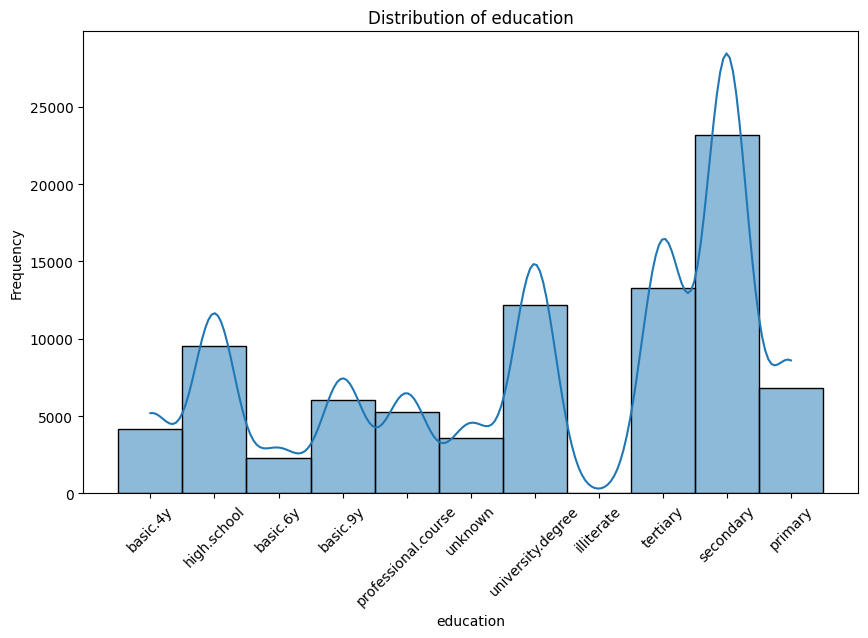

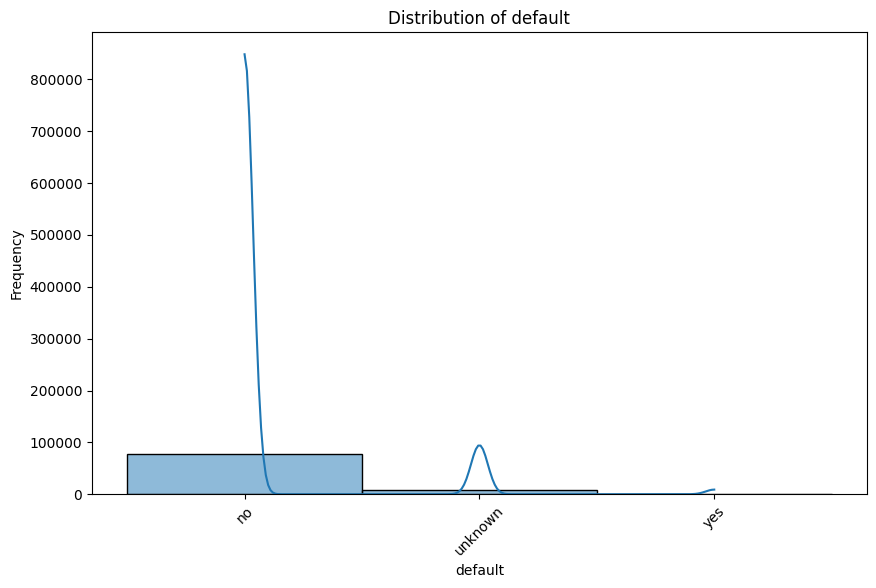

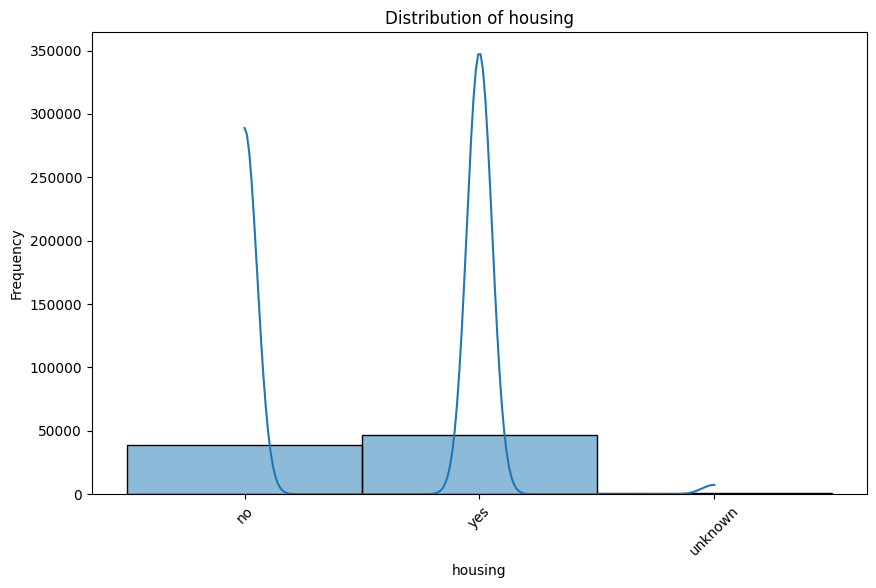

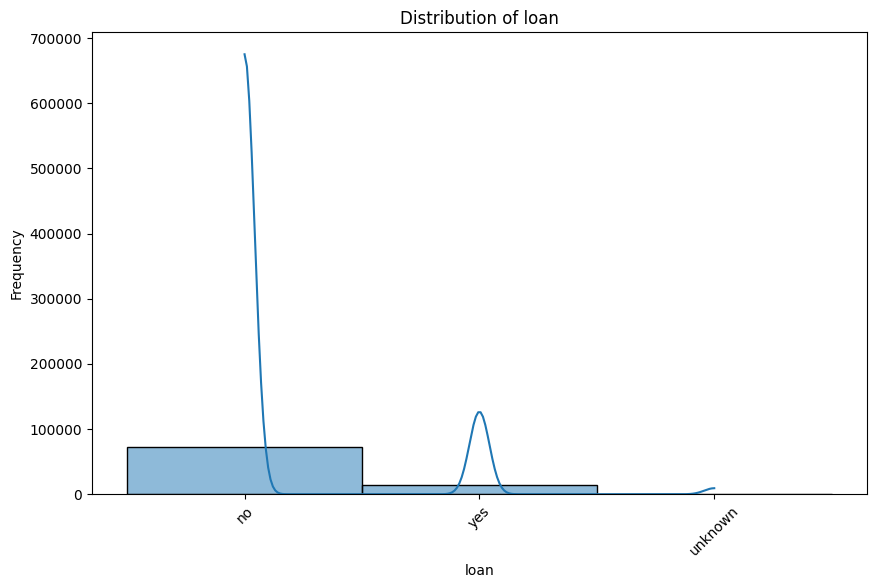

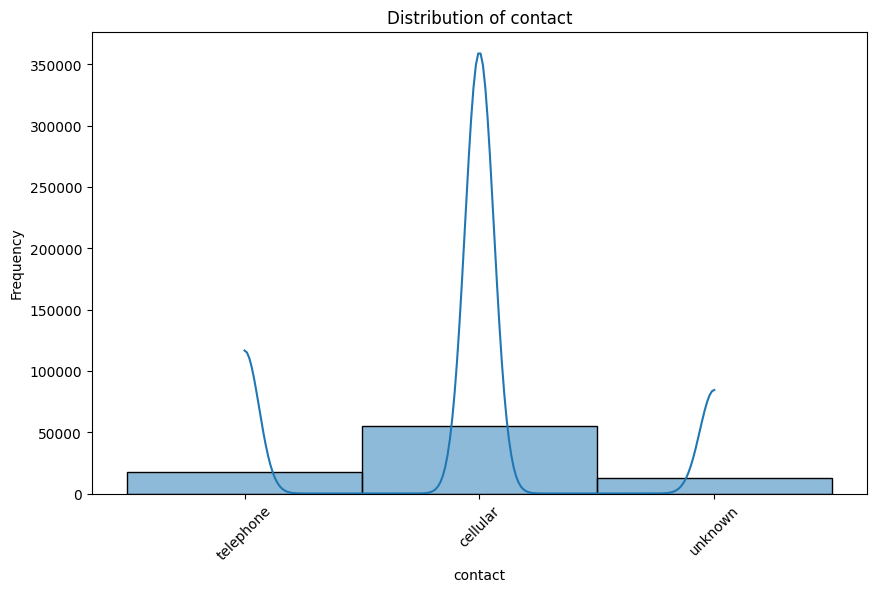

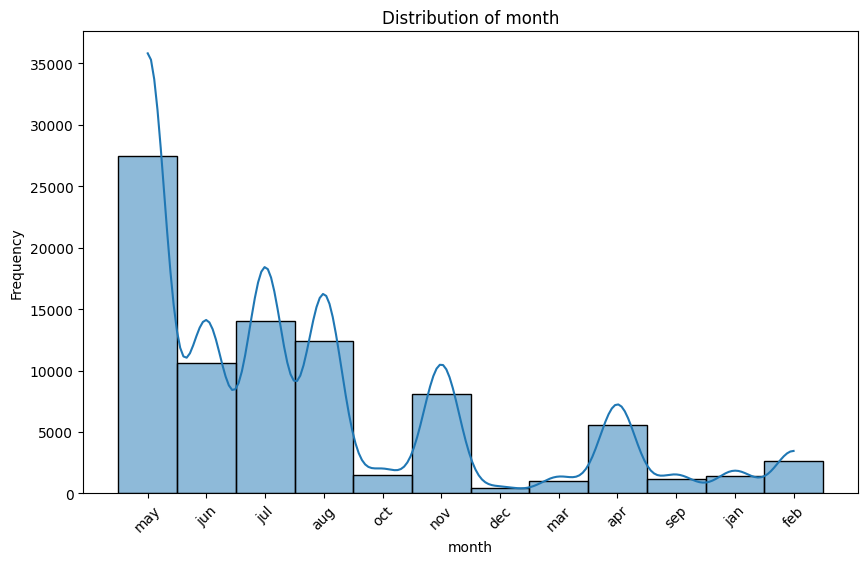

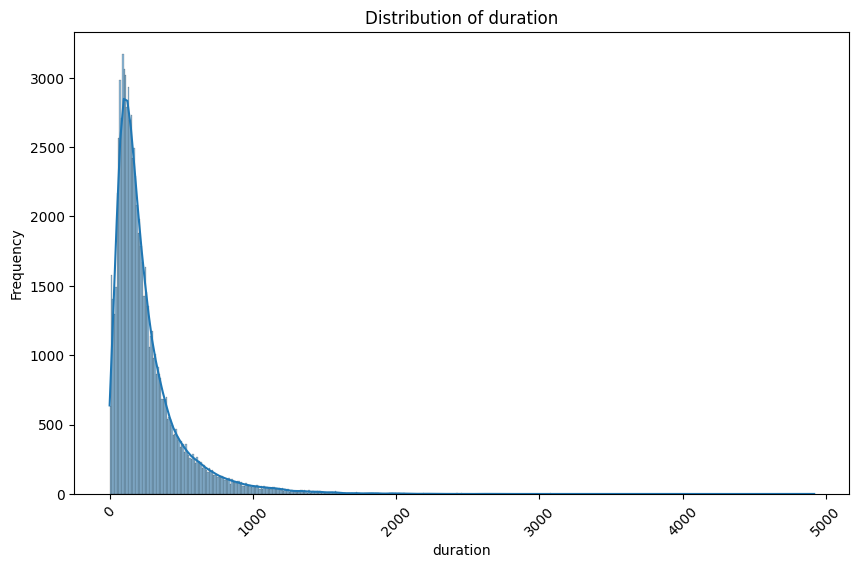

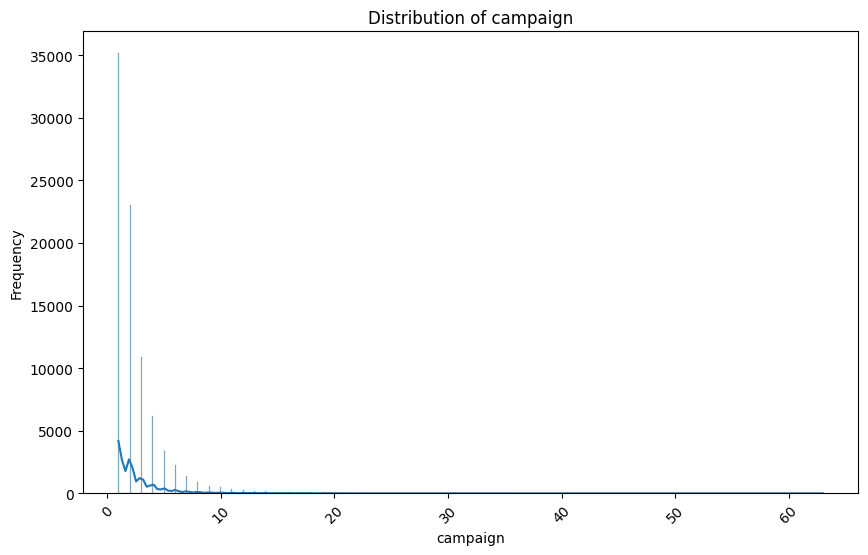

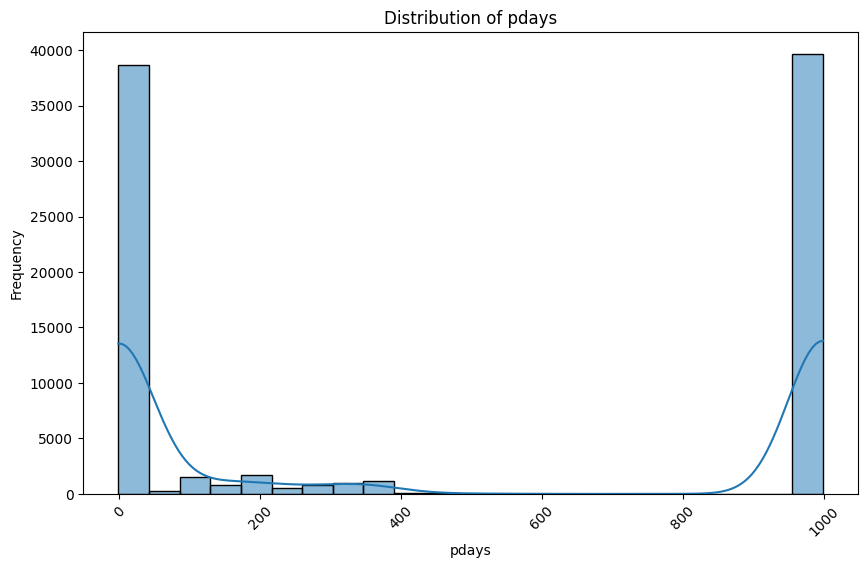

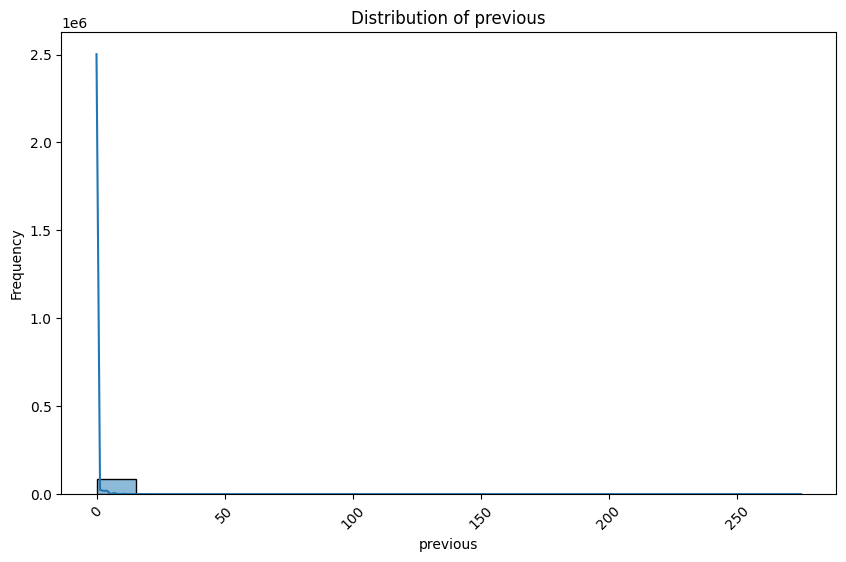

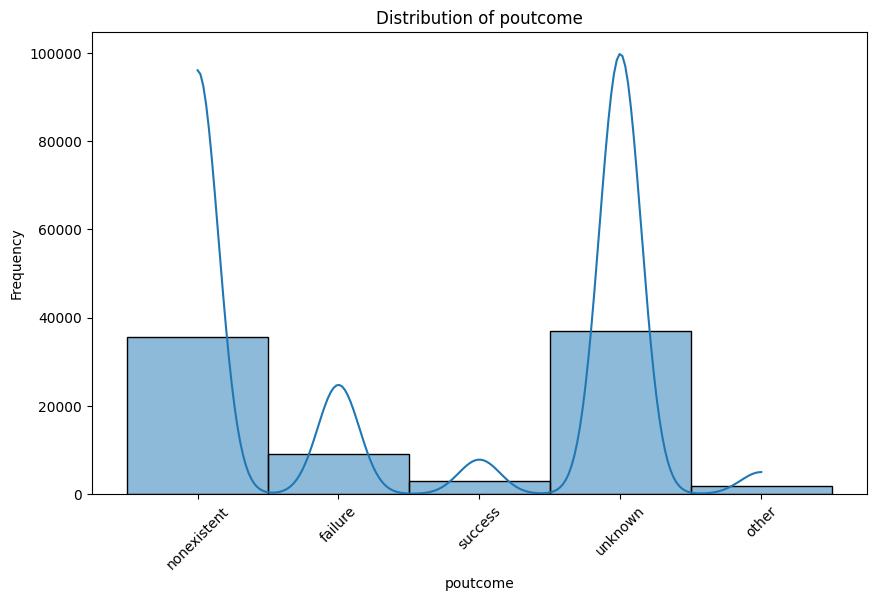

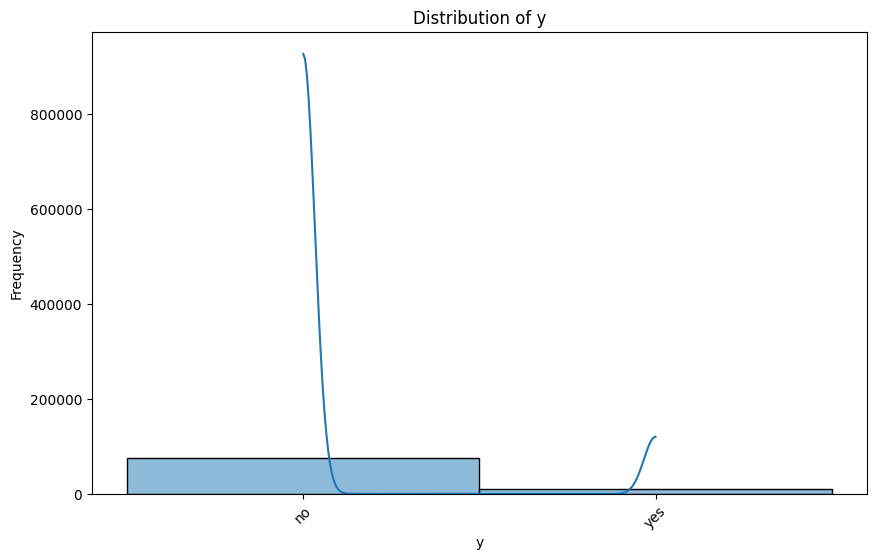

In [67]:
for col in df_combined.columns:
  plt.figure(figsize=(10, 6))
  plt.title(f"Distribution of {col}")
  sns.histplot(df_combined[col], kde=True)
  plt.xlabel(col)
  plt.xticks(rotation=45)
  plt.ylabel("Frequency")
  plt.show()

### Preprocessing
The data is imbalanced hence calling for SMOTE technique. Smote over Random Oversampler to avoid duplicating datapoints and hence, avoiding overfitting of the model.

Also, we need to encode the categorical features

In [70]:
!pip install imblearn optuna xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 32.2 MB/s eta 0:00:00


In [86]:
## Importing quite a lot of stuff
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import optuna
import joblib

We will only be using SMOTE on the train data as we don't care about class imbalance for the test/validation data. We just want to see how well our model is able to generalize

In [80]:
def preprocess_data(data=df_combined):
  encoder = LabelEncoder()
  data_encoded = data.copy()
  for col in data.columns:
    if data[col].dtype == "object":
      data_encoded[col] = encoder.fit_transform(data[col])

  X = data_encoded.drop("y", axis=1)
  y = data_encoded["y"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

  sampler = SMOTE(random_state=12)
  X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

  return data_encoded, X_train_resampled, X_test, y_train_resampled, y_test

In [82]:
df_combined_encoded, X_train, X_test, y_train, y_test = preprocess_data(df_combined)

In [83]:
df_combined_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,3,1,0,0,0,0,1,8,261,1,999,0,1,0
1,57,7,1,3,1,0,0,1,8,149,1,999,0,1,0
2,37,7,1,3,0,2,0,1,8,226,1,999,0,1,0
3,40,0,1,1,0,0,0,1,8,151,1,999,0,1,0
4,56,7,1,3,0,0,2,1,8,307,1,999,0,1,0


Check for the class distribution for the train data

In [85]:
y_train.value_counts() # This has been balanced, thanks to the interpolation of points used in SMOTE

,count
y,
0,61123
1,61123


### Optuna (Best Parameters for the Model)

In [90]:
def objective(trial):
  n_estimators = trial.suggest_int("n_estimators", 10, 300)
  max_depth = trial.suggest_int("max_depth", 2, 32)
  min_samples_split= trial.suggest_int("min_samples_split", 2, 10)
  min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

  # Training the model with suggested parameters
  model = RandomForestClassifier(n_estimators=n_estimators, max_depth= max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print(f"Best Value: {study.best_value}")
print(f"Best Trial: {study.best_trial}")

# To check the full dataframe of the trials, and score
print("Full Dataframe")
study.trials_dataframe()

[I 2025-07-16 09:22:12,166] A new study created in memory with name: no-name-219794da-9ed8-4eef-9fb2-e2222870c27f
[I 2025-07-16 09:22:14,355] Trial 0 finished with value: 0.8208618093362678 and parameters: {'n_estimators': 49, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8208618093362678.
[I 2025-07-16 09:22:16,239] Trial 1 finished with value: 0.8785474342638712 and parameters: {'n_estimators': 19, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8785474342638712.
[I 2025-07-16 09:22:19,463] Trial 2 finished with value: 0.791903162284258 and parameters: {'n_estimators': 140, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8785474342638712.
[I 2025-07-16 09:22:23,614] Trial 3 finished with value: 0.8472720954477007 and parameters: {'n_estimators': 61, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.

Best Value: 0.88688752461485
Best Trial: FrozenTrial(number=7, state=1, values=[0.88688752461485], datetime_start=datetime.datetime(2025, 7, 16, 9, 23, 12, 77146), datetime_complete=datetime.datetime(2025, 7, 16, 9, 23, 27, 718164), params={'n_estimators': 154, 'max_depth': 31, 'min_samples_split': 9, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=10, step=1), 'max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=7, value=None)
Full Dataframe


,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,0.820862,2025-07-16 09:22:12.167377,2025-07-16 09:22:14.355360,0 days 00:00:02.187983,7,10,10,49,COMPLETE
1,1,0.878547,2025-07-16 09:22:14.356225,2025-07-16 09:22:16.239687,0 days 00:00:01.883462,22,2,6,19,COMPLETE
2,2,0.791903,2025-07-16 09:22:16.240536,2025-07-16 09:22:19.463492,0 days 00:00:03.222956,3,5,6,140,COMPLETE
3,3,0.847272,2025-07-16 09:22:19.464346,2025-07-16 09:22:23.614304,0 days 00:00:04.149958,12,5,6,61,COMPLETE
4,4,0.879242,2025-07-16 09:22:23.615111,2025-07-16 09:22:51.366955,0 days 00:00:27.751844,24,4,6,291,COMPLETE
5,5,0.867775,2025-07-16 09:22:51.367871,2025-07-16 09:23:10.209159,0 days 00:00:18.841288,18,8,6,221,COMPLETE
6,6,0.870497,2025-07-16 09:23:10.210015,2025-07-16 09:23:12.076340,0 days 00:00:01.866325,23,9,4,21,COMPLETE
7,7,0.886888,2025-07-16 09:23:12.077146,2025-07-16 09:23:27.718164,0 days 00:00:15.641018,31,1,9,154,COMPLETE
8,8,0.874493,2025-07-16 09:23:27.719059,2025-07-16 09:23:36.462934,0 days 00:00:08.743875,22,7,3,97,COMPLETE
9,9,0.879937,2025-07-16 09:23:36.463782,2025-07-16 09:23:52.238125,0 days 00:00:15.774343,31,4,3,164,COMPLETE


We can see that the trail 7 is the best trial with and accuracy of 88.69%

Params: {'n_estimators': 154, 'max_depth': 31, 'min_samples_split': 9, 'min_samples_leaf': 1}

We can go ahead and use this to train our model

In [96]:
class Model():
  def __init__(self, model=None):
    if model is not None:
      self.model = model
    else:
      self.model = RandomForestClassifier(n_estimators=154, max_depth=31, min_samples_split=9, min_samples_leaf=1)

  def train(self, X_train, y_train):
    self.model.fit(X_train, y_train)
    print(f"Model trained with {X_train.shape[0]} samples")

  def predict(self, X_test):
    y_pred = self.model.predict(X_test)
    return y_pred

  def evaluate(self, y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

  def dump_model(self, path):
    joblib.dump(self.model, path)
    print(f"Model saved to {path}")

  def load_model(self, path):
    self.model = joblib.load(path)
    print(f"Model loaded from {path}")

In [97]:
model = Model() #setting model param to None so we can use the default
model.train(X_train, y_train)
y_pred = model.predict(X_test)
model.evaluate(y_test, y_pred)

Model trained with 122246 samples
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     15276
           1       0.50      0.65      0.57      1990

    accuracy                           0.89     17266
   macro avg       0.73      0.78      0.75     17266
weighted avg       0.90      0.89      0.89     17266

[[13998  1278]
 [  696  1294]]
Accuracy: 0.8856712614386656


Our model was able to perform just so well on the test data as well. But, we can say this is well anticipated since we've used Optuna already. We can be sure at least that our model is production-ready. With just a few tweaks, we can put the model out on live data.

### What's next?
- Using a validation data the model hasn't seen before to cross validate.
- Experimenting with other classifiers.

----
Thanks for staying around,
Mayowa Temitope, AKINYELE 🤖 💻 ☕